# 🎬 Exploratory Data Analysis & Interactive Dashboard
## TMDB Movies Dataset

### Author: r-agyei-dev
### Generated on: 2026-02-15

---
## Executive Summary
This notebook presents a structured exploratory data analysis (EDA) workflow
culminating in an interactive dashboard for dynamic filtering and visualization.


The objectives of this analysis are to:

1. Understand dataset structure and quality

2. Perform systematic data cleaning

3. Engineer meaningful analytical features

4. Conduct statistical and grouped analysis

5. Quantify financial performance drivers in film production

6. Evaluate statistical relationships between rating, budget, and revenue

7. Engineer financial metrics (Profit, ROI)

8. Build predictive regression model for revenue estimation

9. Develop interactive analytical dashboard


This notebook is structured to reflect professional data science workflow standards used in research labs, analytics teams, and production environments.

## 1. Environment Setup


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)


## 2. Data Loading


In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Machine_Learning_Software_Developer/EXPLORATORY_DATA_ANALYSIS/')
df = pd.read_csv('tmdb_movies.csv')
df.head()


Mounted at /content/drive


,id,title,genre,release_date,release_year,budget,revenue,runtime,vote_average,vote_count,production_country
0,1,Movie Title 1,"Science Fiction, Comedy, Horror",1957-01-01,1957,36972721,1.306928e+08,123,4.496790,9221,Germany
1,2,Movie Title 2,"Documentary, Romance",1999-01-01,1999,96359319,2.947975e+08,146,5.803306,4592,China
2,3,Movie Title 3,"Science Fiction, Action",1941-01-01,1941,135172742,1.048409e+08,168,2.710639,7146,Japan
3,4,Movie Title 4,"Comedy, Drama, Adventure",1961-01-01,1961,129049379,1.535585e+08,134,5.631398,8363,Germany
4,5,Movie Title 5,"Comedy, Romance",1969-01-01,1969,151390401,1.008291e+08,116,4.245862,9487,Japan


## 3. Data Cleaning:

###### This section evaluates data integrity and reliability. By converting date formats and removing critical missing financial values, we ensure that downstream statistical calculations are valid. Cleaning reveals whether the dataset is analytically usable and highlights potential biases introduced by missing revenue or budget entries.


In [19]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
if (df.isna().sum() == 1).any():
  df = df.dropna(subset=['budget', 'revenue', 'vote_average'])

## 4. Feature Engineering:

###### Feature engineering transforms raw variables into financially meaningful metrics. Profit quantifies absolute financial success, while ROI (profit_ratio) normalizes returns relative to investment size. The decade feature enables temporal trend analysis. This section reveals structural drivers of performance rather than just raw totals.


In [22]:
df['profit'] = df['revenue'] - df['budget']
df['profit_ratio'] = df['revenue'] / df['budget']
df['decade'] = (df['release_date'].dt.year // 10) * 10
df.head()

,id,title,genre,release_date,release_year,budget,revenue,runtime,vote_average,vote_count,production_country,profit,profit_ratio,decade
0,1,Movie Title 1,"Science Fiction, Comedy, Horror",1957-01-01,1957,36972721,1.306928e+08,123,4.496790,9221,Germany,9.372012e+07,3.534845,1950
1,2,Movie Title 2,"Documentary, Romance",1999-01-01,1999,96359319,2.947975e+08,146,5.803306,4592,China,1.984382e+08,3.059356,1990
2,3,Movie Title 3,"Science Fiction, Action",1941-01-01,1941,135172742,1.048409e+08,168,2.710639,7146,Japan,-3.033185e+07,0.775607,1940
3,4,Movie Title 4,"Comedy, Drama, Adventure",1961-01-01,1961,129049379,1.535585e+08,134,5.631398,8363,Germany,2.450911e+07,1.189920,1960
4,5,Movie Title 5,"Comedy, Romance",1969-01-01,1969,151390401,1.008291e+08,116,4.245862,9487,Japan,-5.056134e+07,0.666020,1960


## 5. Descriptive Statiscal Summary:


###### This section provides a quantitative overview of the dataset’s numerical variables using df.describe(). It summarizes central tendency (mean, median via 50th percentile), dispersion (standard deviation), and range (minimum and maximum values), along with quartile distributions (25th and 75th percentiles).

In [5]:
df[['budget','revenue','profit','vote_average','runtime']].describe()


,budget,revenue,profit,vote_average,runtime
count,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,1.199285e+08,3.325427e+08,2.126142e+08,5.403200,128.560000
std,7.501923e+07,2.760798e+08,2.249544e+08,2.716531,29.265183
min,1.581646e+06,4.004654e+06,-1.136745e+08,1.076640,80.000000
25%,4.954816e+07,9.697859e+07,3.348029e+07,2.898215,102.500000
50%,1.174061e+08,2.541225e+08,1.665190e+08,5.157603,132.000000
75%,1.881243e+08,5.287118e+08,3.528900e+08,7.944961,151.000000
max,2.452930e+08,1.105000e+09,8.656531e+08,9.956007,177.000000


## 6. Univariate Analysis:

##### This section provides a quantitative overview of the dataset’s numerical variables using df.describe(). It summarizes central tendency (mean, median via 50th percentile), dispersion (standard deviation), and range (minimum and maximum values), along with quartile distributions (25th and 75th percentiles).

### Budget Distribution


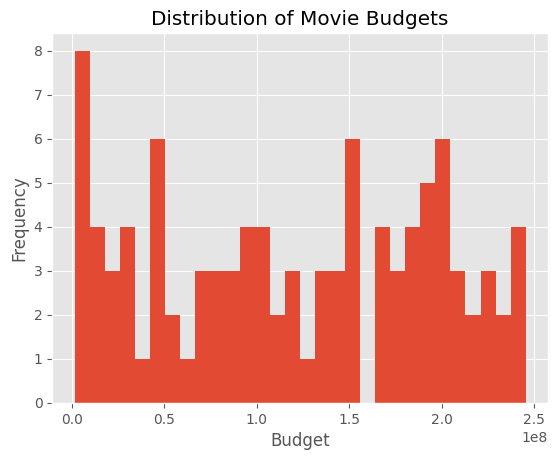

In [6]:
df['budget'].hist(bins=30)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()


### Revenue Distribution

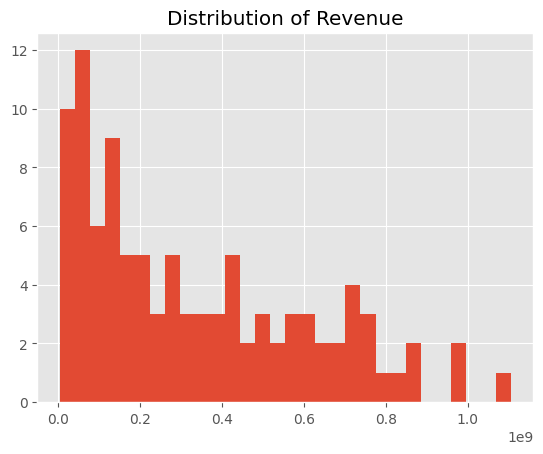

In [23]:
df['revenue'].hist(bins=30)
plt.title('Distribution of Revenue')
plt.show()

## 7. Bivariate Analysis


###### Bivariate analysis explores relationships between pairs of variables. The budget vs revenue scatterplot reveals scaling behavior and variability in financial returns. The correlation matrix quantifies linear relationships, helping identify which variables are statistically associated and suitable for predictive modeling.


### Budget vs Revenue Comparison

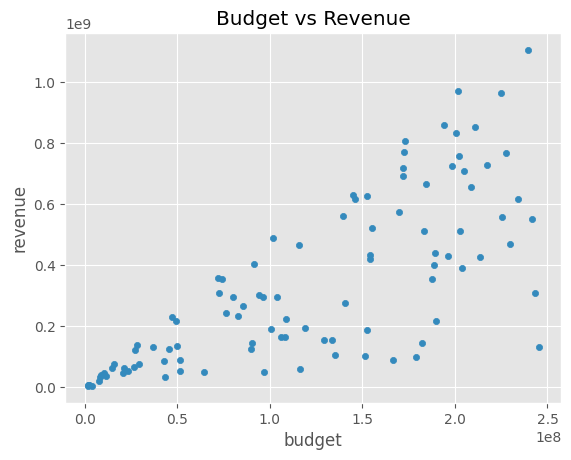

In [26]:
df.plot(kind='scatter',x='budget',y='revenue',title = 'Budget vs Revenue')
plt.show()

### Correlation Matrix

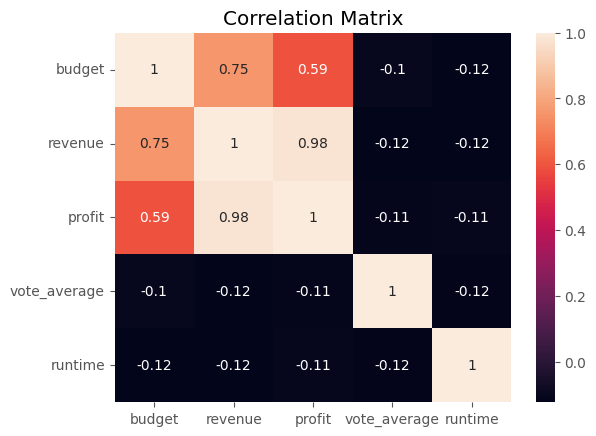

In [24]:
corr = df[['budget','revenue','profit','vote_average','runtime']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()


## 8. Grouped & Aggregrate Analysis


###### Grouped analysis uncovers structural patterns across categorical dimensions such as genre and decade. It reveals whether certain genres systematically outperform others and whether profitability changes over time. This section moves from individual film performance to industry-level insights.

### Average Metrics by Genre

In [29]:
df.groupby('genre')[['budget','revenue','profit']].mean()

,budget,revenue,profit
genre,,,
Action,1.133887e+08,3.813081e+08,2.679194e+08
"Action, Adventure",3.303189e+07,8.577078e+07,5.273889e+07
"Action, Adventure, Horror",1.080569e+08,1.629865e+08,5.492961e+07
"Action, Adventure, Science Fiction",1.005928e+08,1.895320e+08,8.893922e+07
"Action, Comedy, Documentary",1.581646e+06,4.869292e+06,3.287646e+06
...,...,...,...
"Science Fiction, Comedy, Horror",3.697272e+07,1.306928e+08,9.372012e+07
"Science Fiction, Comedy, Romance",1.845513e+08,6.671507e+08,4.825995e+08
"Science Fiction, Drama",3.892348e+06,4.004654e+06,1.123057e+05


### Movie Count by Decade

In [32]:
df.groupby('decade')[['budget','revenue','profit']].mean()

,budget,revenue,profit
decade,,,
1940,1.062193e+08,2.594127e+08,1.531933e+08
1950,1.503515e+08,4.132222e+08,2.628707e+08
1960,1.027209e+08,2.541347e+08,1.514138e+08
1970,1.019333e+08,3.021892e+08,2.002559e+08
1980,1.284344e+08,3.339189e+08,2.054846e+08
1990,1.114463e+08,4.183056e+08,3.068592e+08
2000,1.159051e+08,2.650291e+08,1.491240e+08
2010,1.238207e+08,2.897487e+08,1.659280e+08
2020,1.493016e+08,5.362896e+08,3.869880e+08


### Profitability Analysis

In [35]:
profitable = df[df['profit'] > 0]
loss_making = df[df['profit'] <= 0]

## 9. Advanced Filtering Examples:

### High Budget, Low Rating

In [36]:
df[(df['budget'] > 100_000_000) & (df['vote_average'] < 6)]

,id,title,genre,release_date,release_year,budget,revenue,runtime,vote_average,vote_count,production_country,profit,profit_ratio,decade
2,3,Movie Title 3,"Science Fiction, Action",1941-01-01,1941,135172742,1.048409e+08,168,2.710639,7146,Japan,-3.033185e+07,0.775607,1940
3,4,Movie Title 4,"Comedy, Drama, Adventure",1961-01-01,1961,129049379,1.535585e+08,134,5.631398,8363,Germany,2.450911e+07,1.189920,1960
4,5,Movie Title 5,"Comedy, Romance",1969-01-01,1969,151390401,1.008291e+08,116,4.245862,9487,Japan,-5.056134e+07,0.666020,1960
5,6,Movie Title 6,Adventure,2020-01-01,2020,169912312,5.724923e+08,163,1.167285,3801,India,4.025800e+08,3.369340,2020
14,15,Movie Title 15,"Comedy, Horror, Documentary",1950-01-01,1950,144659170,6.292065e+08,165,2.538856,5851,Canada,4.845473e+08,4.349579,1950
16,17,Movie Title 17,"Drama, Horror",1981-01-01,1981,241476905,5.524727e+08,131,5.474881,6062,Germany,3.109958e+08,2.287890,1980
27,28,Movie Title 28,"Horror, Drama, Comedy",1985-01-01,1985,188879128,3.992748e+08,130,5.139106,4275,Canada,2.103957e+08,2.113917,1980
34,35,Movie Title 35,"Comedy, Drama, Science Fiction",1999-01-01,1999,201455904,9.709111e+08,88,2.505799,8223,United Kingdom,7.694552e+08,4.819472,1990
36,37,Movie Title 37,Adventure,1981-01-01,1981,152204919,1.864492e+08,163,3.091152,2976,France,3.424425e+07,1.224988,1980
37,38,Movie Title 38,"Adventure, Drama",1958-01-01,1958,211107826,8.520328e+08,95,5.487265,5391,France,6.409249e+08,4.036008,1950


### High Rating, Low Revenue

In [37]:
df[(df['vote_average'] > 8) & (df['revenue'] < 50_000_000)]

,id,title,genre,release_date,release_year,budget,revenue,runtime,vote_average,vote_count,production_country,profit,profit_ratio,decade
15,16,Movie Title 16,"Drama, Comedy",2010-01-01,2010,8140456,3.245547e+07,95,8.595520,2409,United States of America,2.431502e+07,3.986936,2010
45,46,Movie Title 46,"Adventure, Science Fiction",1984-01-01,1984,2206624,5.417706e+06,112,9.366886,3069,United Kingdom,3.211082e+06,2.455201,1980
90,91,Movie Title 91,"Documentary, Science Fiction, Comedy",2017-01-01,2017,11357818,3.656208e+07,145,8.741617,6030,France,2.520426e+07,3.219111,2010


## 10. Interactive Dashboard


In [13]:
genres = df['genre'].dropna().str.split(',').explode().str.strip().unique()

genre_dropdown = widgets.Dropdown(
    options=['All'] + sorted(genres.tolist()),
    value='All',
    description='Genre:'
)

rating_slider = widgets.FloatSlider(
    min=0,
    max=10,
    step=0.5,
    value=5,
    description='Min Rating:'
)

def update_dashboard(genre, min_rating):
    filtered = df[df['vote_average'] >= min_rating]
    if genre != 'All':
        filtered = filtered[filtered['genre'].str.contains(genre, na=False)]
    if filtered.empty:
        print('No data matches selected filters.')
        return
    display(filtered.describe())
    fig = px.scatter(
        filtered,
        x='budget',
        y='revenue',
        size='vote_count',
        color='vote_average',
        hover_name='title',
        title='Budget vs Revenue (Filtered)'
    )
    fig.show()



from google.colab import output
output.enable_custom_widget_manager()


widgets.interactive(update_dashboard, genre=genre_dropdown, min_rating=rating_slider)
# display(genre_dropdown, rating_slider, dashboard)

interactive(children=(Dropdown(description='Genre:', options=('All', 'Action', 'Adventure', 'Comedy', 'Documen…

## 11. Advanced Analytical Extensions

### Log-Scale Transformations:


###### Film budget and revenue data are typically heavily right-skewed, with a small number of blockbuster films generating disproportionately large financial returns. Logarithmic transformation helps stabilize variance and improve interpretability.

In [38]:
df['log_budget'] = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])

## Time-Series Trend Visualization

##### To analyze how financial and rating metrics evolve over time

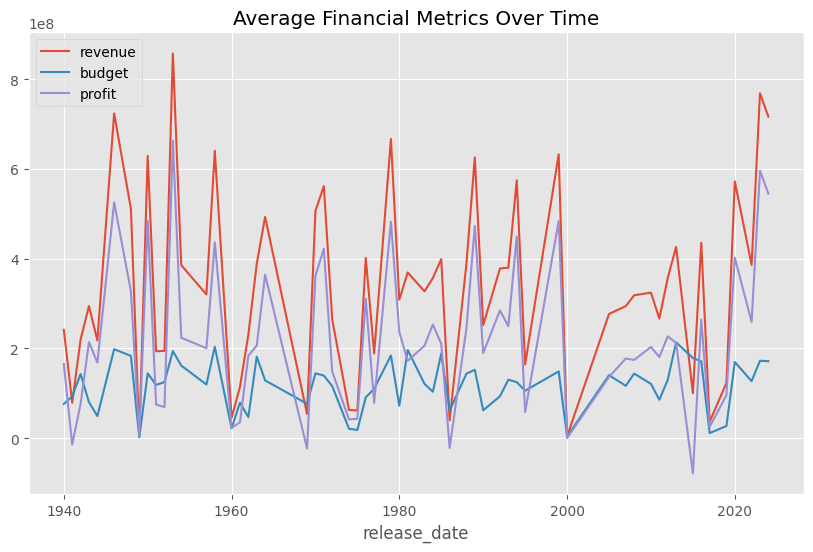

In [40]:
yearly_trends = df.groupby(df['release_date'].dt.year)[['revenue','budget','profit']].mean()

yearly_trends.plot(figsize=(10,6))
plt.title('Average Financial Metrics Over Time')
plt.show()

### 13. Genre Normalization for Multi-Genre Films

###### Many films belong to multiple genres. Treating genre as a single categorical variable may distort grouped analysis

In [42]:
df_exploded = df.assign(
    genre=df['genre'].str.split(',')
).explode('genre')

df_exploded['genre'] = df_exploded['genre'].str.strip()
df_exploded

,id,title,genre,release_date,release_year,budget,revenue,runtime,vote_average,vote_count,production_country,profit,profit_ratio,decade,log_budget,log_revenue
0,1,Movie Title 1,"Science Fiction, Comedy, Horror",1957-01-01,1957,36972721,1.306928e+08,123,4.496790,9221,Germany,9.372012e+07,3.534845,1950,17.425691,18.688360
1,2,Movie Title 2,"Documentary, Romance",1999-01-01,1999,96359319,2.947975e+08,146,5.803306,4592,China,1.984382e+08,3.059356,1990,18.383595,19.501799
2,3,Movie Title 3,"Science Fiction, Action",1941-01-01,1941,135172742,1.048409e+08,168,2.710639,7146,Japan,-3.033185e+07,0.775607,1940,18.722064,18.467954
3,4,Movie Title 4,"Comedy, Drama, Adventure",1961-01-01,1961,129049379,1.535585e+08,134,5.631398,8363,Germany,2.450911e+07,1.189920,1960,18.675706,18.849592
4,5,Movie Title 5,"Comedy, Romance",1969-01-01,1969,151390401,1.008291e+08,116,4.245862,9487,Japan,-5.056134e+07,0.666020,1960,18.835373,18.428937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Movie Title 96,"Adventure, Romance, Action",1963-01-01,1963,154295031,4.187739e+08,152,5.176100,5874,United States of America,2.644789e+08,2.714111,1960,18.854377,19.852842
96,97,Movie Title 97,Romance,1954-01-01,1954,229800243,4.685299e+08,143,1.545710,8398,France,2.387297e+08,2.038857,1950,19.252721,19.965110
97,98,Movie Title 98,"Romance, Documentary, Horror",1994-01-01,1994,239347042,1.105000e+09,83,1.724018,7113,United States of America,8.656531e+08,4.616728,1990,19.293425,20.823111
98,99,Movie Title 99,"Comedy, Drama",2022-01-01,2022,172874604,8.066428e+08,168,1.491389,9916,Japan,6.337682e+08,4.666057,2020,18.968077,20.508391


## 14. Predictive Modeling for Revenue Estimation

###### Develop a regression model to estimate revenue based on budget, rating, runtime, and other engineered features.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

features = df[['budget','vote_average','runtime']]
target = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("R²:", r2_score(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))


R²: 0.5144923004087913
RMSE: 155067943.0097476
